<a href="https://colab.research.google.com/github/tnguyennr/Unsupervised_algos/blob/main/Diabetes_Unsup_Algos_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining Project/diabetes_012_health_indicators_BRFSS2015.csv')

Data Description

The selected features from the BRFSS 2015 dataset are:

Response Variable / Dependent Variable:

    (Ever told) you have diabetes (If "Yes" and respondent is female, ask "Was this only when you were pregnant?". If Respondent says pre-diabetes or borderline diabetes, use response code 4.) --> DIABETE3

Independent Variables:

High Blood Pressure

    Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional --> _RFHYPE5

High Cholesterol

    Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? --> TOLDHI2
    Cholesterol check within past five years --> _CHOLCHK

BMI

    Body Mass Index (BMI) --> _BMI5

Smoking

    Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] --> SMOKE100

Other Chronic Health Conditions

    (Ever told) you had a stroke. --> CVDSTRK3
    Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) --> _MICHD

Physical Activity

    Adults who reported doing physical activity or exercise during the past 30 days other than their regular job --> _TOTINDA

Diet

    Consume Fruit 1 or more times per day --> _FRTLT1
    Consume Vegetables 1 or more times per day --> _VEGLT1

Alcohol Consumption

    Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) --> _RFDRHV5

Health Care

    Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? --> HLTHPLN1
    Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? --> MEDCOST

Health General and Mental Health

    Would you say that in general your health is: --> GENHLTH
    Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? --> MENTHLTH
    Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? --> PHYSHLTH
    Do you have serious difficulty walking or climbing stairs? --> DIFFWALK

Demographics

    Indicate sex of respondent. --> SEX
    Fourteen-level age category --> _AGEG5YR
    What is the highest grade or year of school you completed? --> EDUCA
    Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") --> INCOME2



In [4]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Right now these are all floats, but some should be treated as categorical and some as continuous - need to fix these datatypes



## Exploratory Analysis





<Axes: xlabel='Diabetes_012', ylabel='count'>

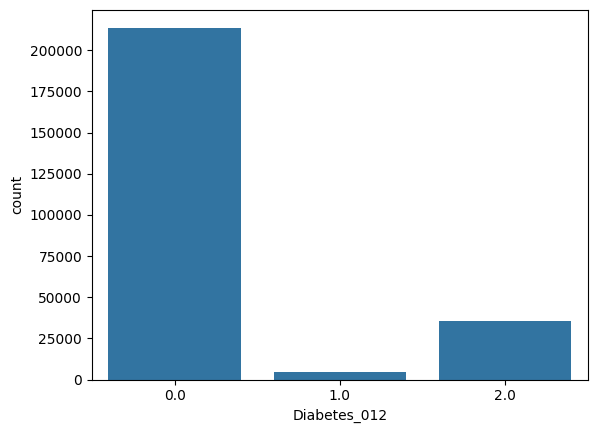

In [6]:
sns.countplot(data = df, x = 'Diabetes_012')

In [7]:
df['Diabetes_012'].value_counts()

,count
Diabetes_012,
0.0,213703
2.0,35346
1.0,4631


Observations:
- Dataset is very imbalanced.  Most people don't have diabetes.  Very few people are diabetic and even less are pre-diabetic.  For this project, we only care about diabetic and pre-diabetic people, so we'll just select rows where those are true.

In [9]:
df = diabetics_and_pre
df.dtypes
#BMI, MentHlth, PhysHlth, Age can all be treated as continuous
#The rest are categorical

,0
Diabetes_012,float64
HighBP,float64
HighChol,float64
CholCheck,float64
BMI,float64
Smoker,float64
Stroke,float64
HeartDiseaseorAttack,float64
PhysActivity,float64
Fruits,float64


In [10]:
continuous_var = ['BMI', 'MentHlth', 'PhysHlth', 'Age']
cat_var = df.drop(continuous_var, axis = 1).columns

In [11]:
df[cat_var] = df[cat_var].astype('category')

<ipython-input-11-8710471a1445>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_var] = df[cat_var].astype('category')


In [12]:
#Now that we have just the diabetic and pre-diabetic data, let's visualize some relationships between the variables

Best way to visualize 2 categorical variables? Especially binary? Visualize continuous independent and discrete dependent/output variable?


<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


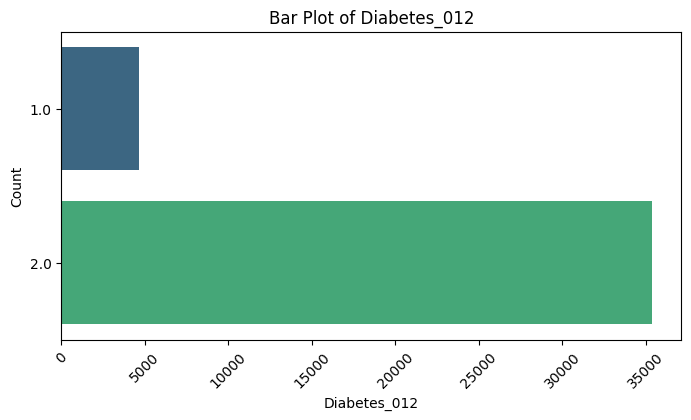

<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


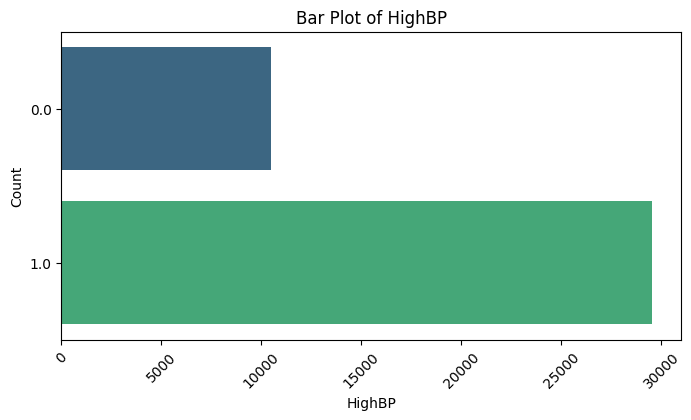

<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


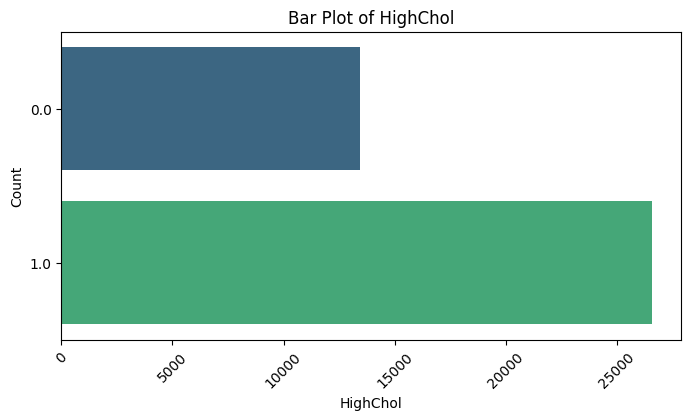

<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


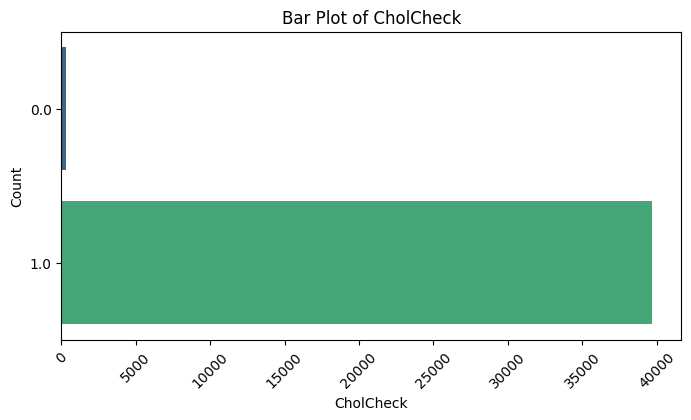

<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


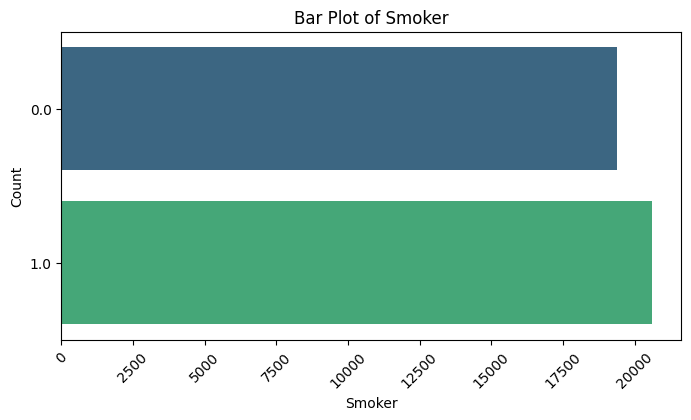

<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


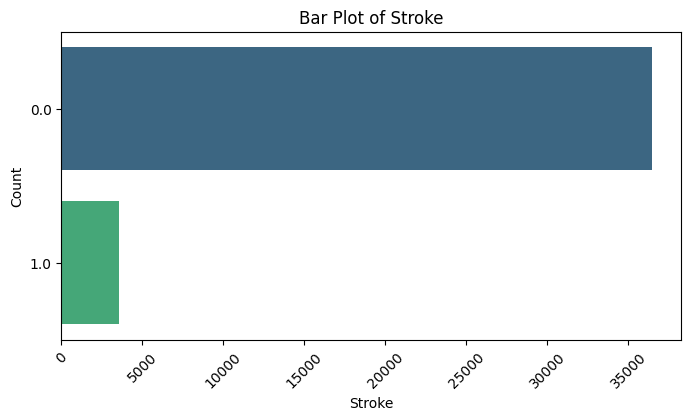

<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


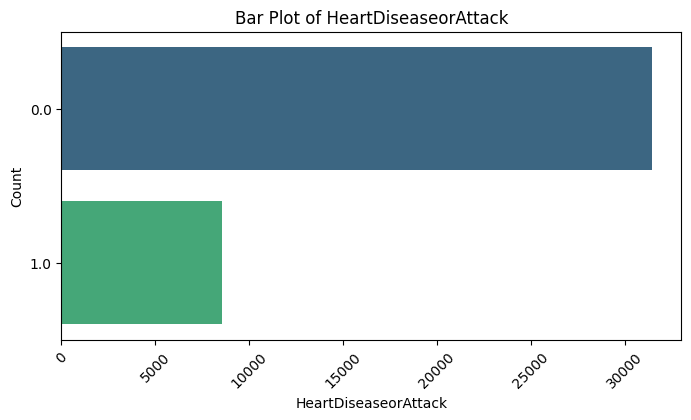

<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


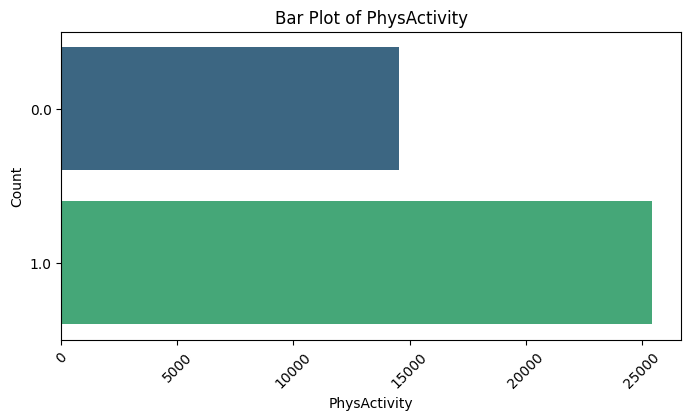

<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


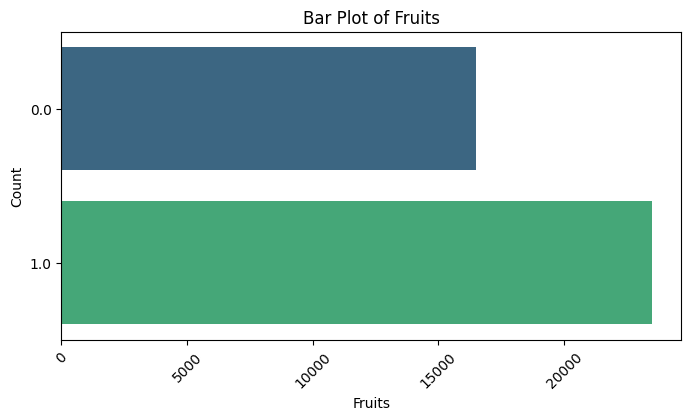

<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


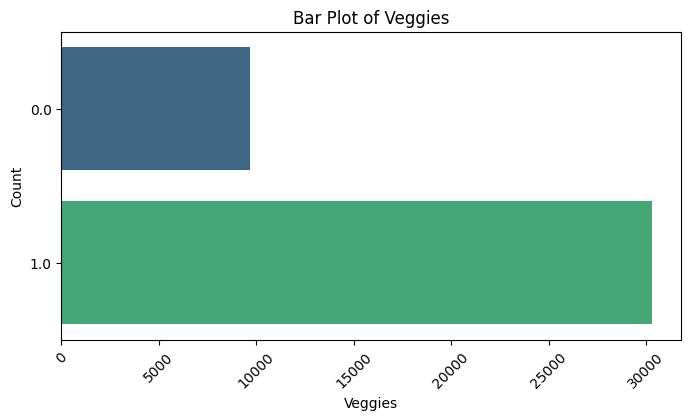

<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


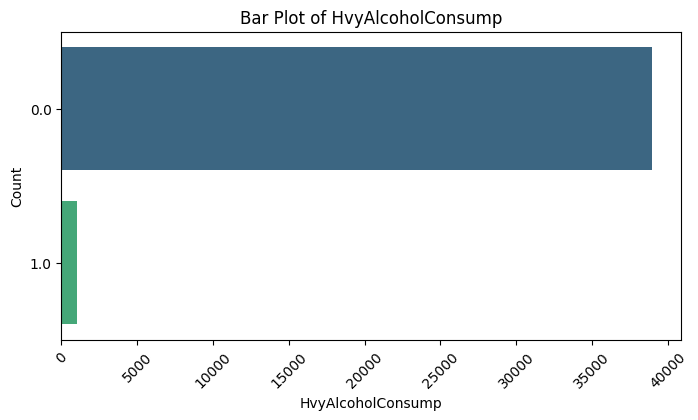

<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


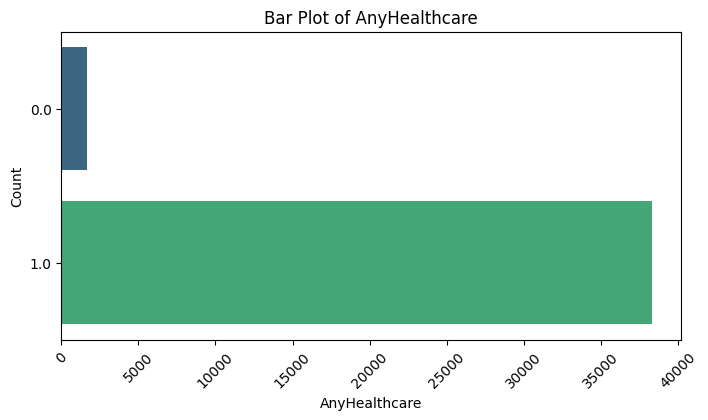

<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


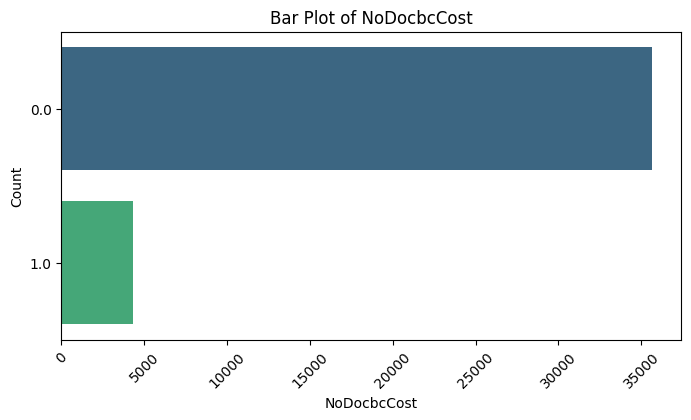

<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you

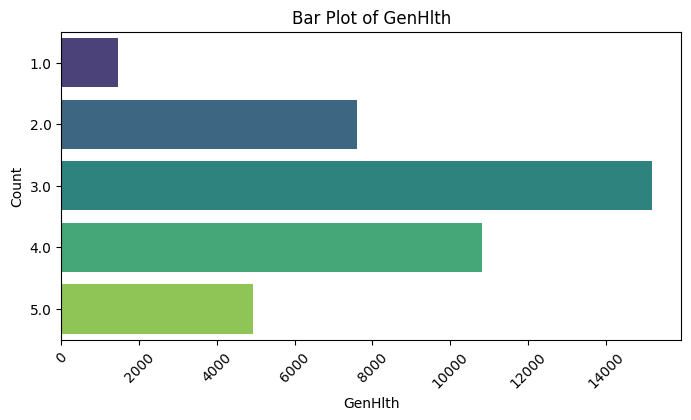

<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


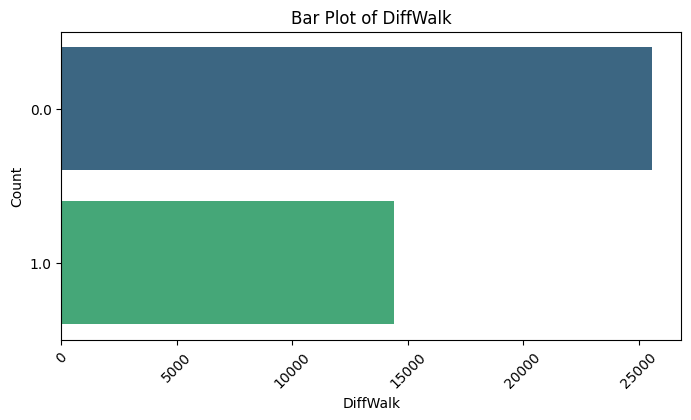

<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


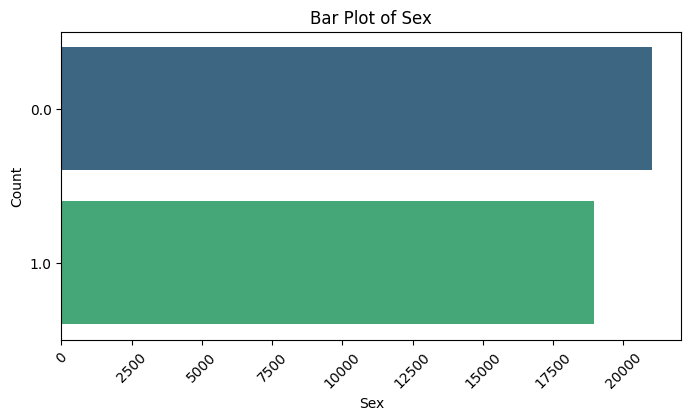

<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you

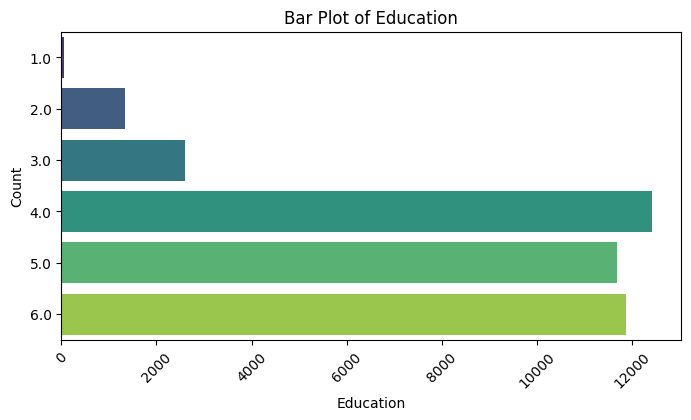

<ipython-input-13-4acc95638d63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you

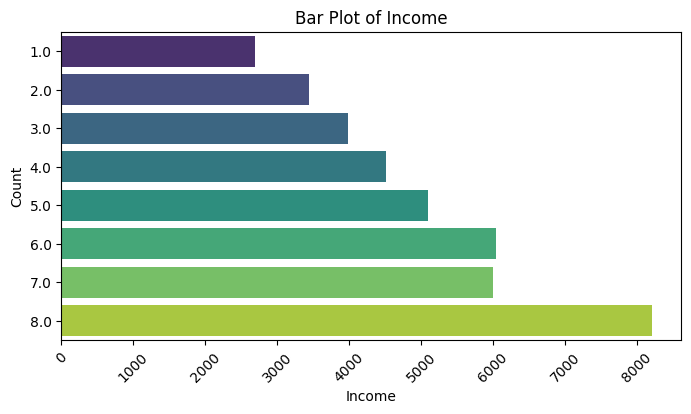

In [13]:
#get barplots for all categorical variables
for column in df.select_dtypes(include=['category']).columns:
  plt.figure(figsize=(8,4))
  sns.countplot(df[column], palette = 'viridis')
  plt.title(f'Bar Plot of {column}')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.xticks(rotation = 45)
  plt.show()

Observations:
- Countplot of income appears ordinal?
- Education is also ordinal, but is frequency more important?
- Heavy alcohol consumption is strongly skewed to having few with this.  Does the imbalance make frequency encoding a better option? There may not be high number of heavy alcohol, but it could possibly have a very strong effect?

In [14]:
cross_tab = pd.crosstab(data['Diabetes_012'],
                        data['Education'],
                        margins = False)

In [15]:
cross_tab

Education,1.0,2.0,3.0,4.0,5.0,6.0
Diabetes_012,,,,,,
0.0,125,2699,6868,50334,58223,95454
1.0,2,161,314,1350,1333,1471
2.0,47,1183,2296,11066,10354,10400


Look at proportions of this to see if there is anything here?  Ex. Does higher education tend to lead to a proportional increase in occurence of diabetes?
What about with other factors like income?

What's an easy way to write logic to iterate through the data and identify ones where there might be relationships?

## Model Building and Fitting

In [16]:
#Starting to cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [18]:
inertia = []

In [19]:
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

In [53]:
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 15), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 15))
plt.grid()
plt.show()

KeyboardInterrupt: 

<Figure size 800x500 with 0 Axes>

In [21]:
df_sample = df.sample(n=10000, random_state=0)

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [23]:
linkage_matrix = linkage(df_sample, method='ward')

In [24]:
linkage_matrix

array([[4.77900000e+03, 9.31400000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.39600000e+03, 6.95800000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.66100000e+03, 6.09900000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.99860000e+04, 1.99900000e+04, 6.29611441e+02, 1.41700000e+03],
       [1.99940000e+04, 1.99960000e+04, 9.09626141e+02, 3.59000000e+03],
       [1.99950000e+04, 1.99970000e+04, 1.49074361e+03, 1.00000000e+04]])

In [25]:
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

KeyboardInterrupt: 

In [26]:
# Create a dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.axhline(y=1.5, color='r', linestyle='--')  # Change this value to your desired cut height
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7d82835b4160> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Option 1: Set a specific cut height to avoid clusters at the top or bottom
cut_height = 1.5  # Choose a height that captures central clusters
clusters_height = fcluster(linkage_matrix, cut_height, criterion='distance')
print("Cluster labels based on height:")
print(clusters_height)

In [ ]:
clusters = fcluster(linkage_matrix, cut_height, criterion='distance')

In [ ]:
unique_clusters = np.unique(clusters)

In [ ]:
unique_clusters

In [ ]:
df_sample['Cluster'] = clusters

In [ ]:
for cluster in unique_clusters:
    print(f"\nSamples in Cluster {cluster}:")
    print(df_sample[df_sample['Cluster'] == cluster].head())

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_sample, clusters)

In [ ]:
silhouette_avg

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#Data is too large, so instead of using whole thing, we'll sample the data
df_sample = df.sample(n=10000, random_state=0)

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters = 4)
df_sample['Cluster'] = agg_cluster.fit_predict(df_sample)

In [ ]:
#If hierarchical clustering also doesn't work, we will try feature engineering or dimensionality reduction?

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df_sample['Feature1'], df_sample['Feature2'], c=df_sample['Cluster'], cmap='viridis', marker='o')
plt.title('Agglomerative Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

In [ ]:
sns.pairplot(df_sample[continuous_var], hue='Cluster')  # Replace with relevant feature names
plt.show()

In [56]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'socioeconomic_status_indicator', 'KMeans_Cluster'],
      dtype='object')

In [ ]:
ses_columns = ['Income', 'Education', 'NoDocbcCost', 'AnyHealthCare' ]

In [57]:
#Use PCA to reduce dimensions and possibly noise
from sklearn.decomposition import PCA

In [58]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [59]:
scaled_features

array([[ 0.36196556,  0.59529157,  0.71070491, ..., -1.90660723,
        -0.66539046, -0.21947913],
       [ 0.36196556, -1.67984908, -1.40705374, ...,  1.25119971,
         1.56150903, -1.42703721],
       [ 0.36196556,  0.59529157,  0.71070491, ...,  0.34896916,
        -0.66539046,  0.98807896],
       ...,
       [ 0.36196556,  0.59529157,  0.71070491, ..., -0.5532614 ,
        -0.66539046, -0.21947913],
       [ 0.36196556,  0.59529157,  0.71070491, ..., -0.5532614 ,
         0.44805928,  0.98807896],
       [ 0.36196556,  0.59529157,  0.71070491, ..., -1.45549195,
        -0.66539046,  0.98807896]])

In [60]:
pca = PCA(n_components = 10)
pca.fit(scaled_features)

PCA(n_components=10)

In [61]:
principal_components = pca.transform(scaled_features)

In [62]:
pca_data = pca.fit_transform(scaled_features)


In [63]:
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

In [ ]:
kmean_pca = KMeans(n_clusters = k)

In [ ]:
pca_inertia = []

In [64]:
for i in range(1,10):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(pca_data)
  pca_inertia.append(kmeans.inertia_)

NameError: name 'pca_inertia' is not defined

In [65]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), pca_inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 15))
plt.grid()
plt.show()

NameError: name 'pca_inertia' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
pca_df_sample = pca_df.sample(n=10000, random_state=0)

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=5)  # Specify the number of clusters
clusters = hierarchical.fit_predict(pca_df_sample)

In [ ]:
Z = linkage(pca_df_sample, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
cut_height = 1.5

In [79]:
clusters = fcluster(Z, cut_height, criterion='distance')

NameError: name 'Z' is not defined

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(pca_df_sample, clusters)

In [ ]:
silhouette_avg

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
#Trying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_clusters = dbscan.fit_predict(pca_df)

# Step 4: Analyze the Resulting Clusters
# The labels are -1 for noise and integers for clusters
print("Cluster labels:", dbscan_clusters)

# Optional: Visualize the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_clusters, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(pca_df, dbscan_clusters)
print("Silhouette Score: ", silhouette_avg)

In [ ]:
clusters

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df)

# Step 4: Analyze the Resulting Clusters
# The labels are -1 for noise and integers for clusters
print("Cluster labels:", clusters)

# Optional: Visualize the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(df, clusters)
print("Silhouette Score: ", silhouette_avg)

Notes for creating indicator with code below:
- If income is above 8 they are making 75k or more per year.  5 means less than 35k per year.  8 has the highest concentration of people in the original dataset, but what about for our new diabetics only dataset? Should visualize to see.  Maybe consider using 7 and above as one group, 3 and below as another, and 4-6 as a third group
- Education is scale 1-6.  5-6 are some college to college grads, 3-4 are some high school to high school grads, and 1-2 are no high school education
- NO doc because of costs and any health care are both binary variables
- How many different classes do we want to create for indicator variable?


In [38]:
#Last thing to try before giving up is to feature engineer our own columns using below as a TEMPLATE
def create_socioeconomic_status_indicator(row):
    if row['Income'] in [7, 8] and row['Education'] in [5, 6]:
        return 3
    elif row['Income'] in [1 ,2 ,3, 4, 5] and row['Education'] in [1, 2]:
        return 2
    else:
        return 1

# Apply the function to create the new feature
df['socioeconomic_status_indicator'] = df.apply(create_socioeconomic_status_indicator, axis=1)




       Diabetes_012 HighBP HighChol CholCheck   BMI Smoker Stroke  \
8               2.0    1.0      1.0       1.0  30.0    1.0    0.0   
10              2.0    0.0      0.0       1.0  25.0    1.0    0.0   
13              2.0    1.0      1.0       1.0  28.0    0.0    0.0   
17              2.0    0.0      0.0       1.0  23.0    1.0    0.0   
23              2.0    1.0      0.0       1.0  27.0    0.0    0.0   
...             ...    ...      ...       ...   ...    ...    ...   
253666          1.0    1.0      0.0       1.0  23.0    0.0    0.0   
253668          2.0    0.0      1.0       1.0  29.0    1.0    0.0   
253670          2.0    1.0      1.0       1.0  25.0    0.0    0.0   
253676          2.0    1.0      1.0       1.0  18.0    0.0    0.0   
253679          2.0    1.0      1.0       1.0  25.0    0.0    0.0   

       HeartDiseaseorAttack PhysActivity Fruits  ... NoDocbcCost GenHlth  \
8                       1.0          0.0    1.0  ...         0.0     5.0   
10                 

<ipython-input-38-fa5594ecbf69>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['socioeconomic_status_indicator'] = df.apply(create_socioeconomic_status_indicator, axis=1)


In [39]:
df['socioeconomic_status_indicator'].value_counts()

,count
socioeconomic_status_indicator,
1,27403
3,11316
2,1258


<Axes: xlabel='socioeconomic_status_indicator', ylabel='count'>

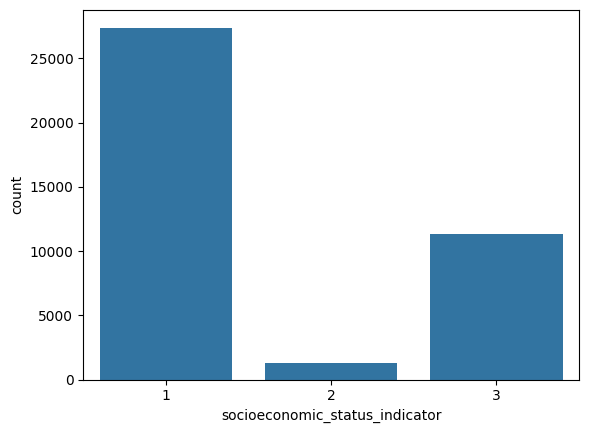

In [40]:
sns.countplot(data = df, x = 'socioeconomic_status_indicator')

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [50]:
kmeans = KMeans(n_clusters = 3)
kmeans_clusters = kmeans.fit_predict(X_scaled)

In [51]:
df["KMeans_Cluster"] = kmeans_clusters

<ipython-input-51-c93ffc3c5618>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["KMeans_Cluster"] = kmeans_clusters


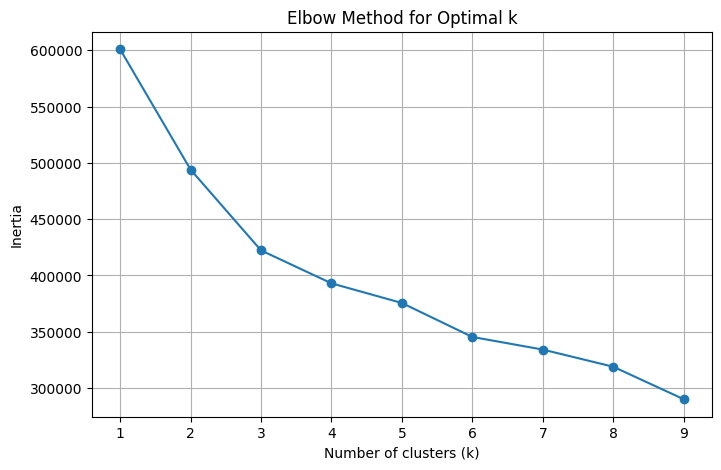

In [78]:
#Do another elbow plot? Check Silhouette Score
inertia = []

for i in range(1,10):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit_predict(pca_df)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 10))
plt.grid()
plt.show()

In [66]:
explained_variance = pca.explained_variance_ratio_
print('Explained variance per principal component:', explained_variance)
print('Total explained variance:', np.sum(explained_variance))


Explained variance per principal component: [0.14504501 0.09168417 0.07013268 0.05543393 0.05180325 0.04647799
 0.04432086 0.04240229 0.04058445 0.03854582]
Total explained variance: 0.6264304278756382


In [67]:
loadings = pca.components_

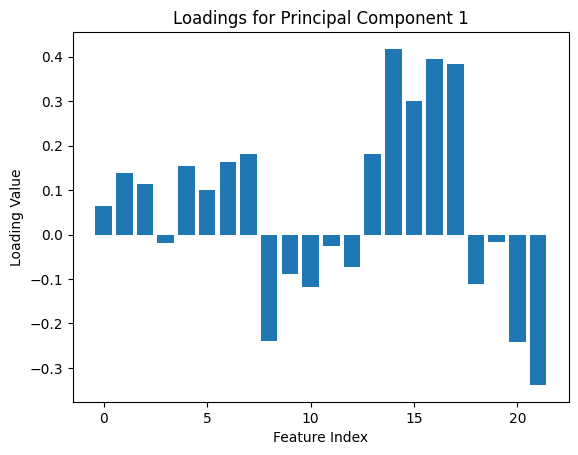

In [59]:
plt.bar(range(len(loadings[0])), loadings[0])
plt.title('Loadings for Principal Component 1')
plt.xlabel('Feature Index')
plt.ylabel('Loading Value')
plt.show()

In [72]:
explained_variance = pca.explained_variance_ratio_

In [73]:
cumulative_variance = np.cumsum(explained_variance)

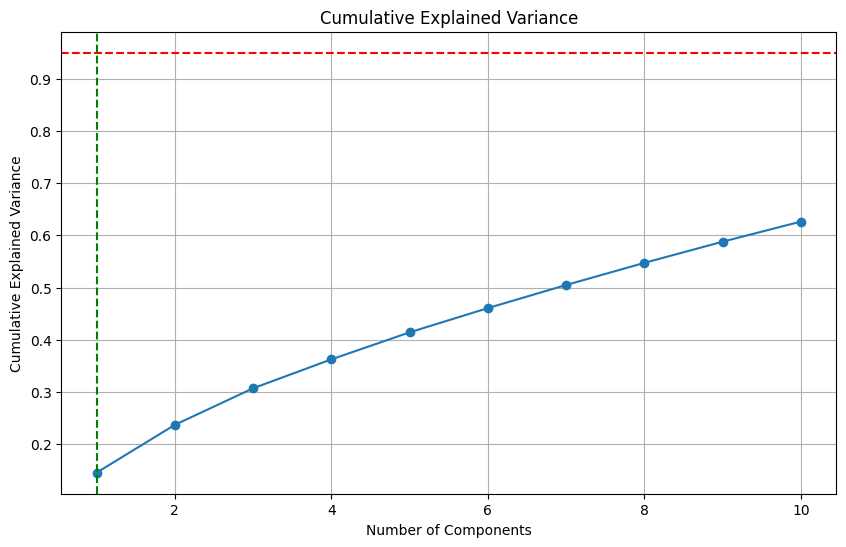

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')  # Example threshold at 95%
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='g', linestyle='--')  # Number of components for 95%
plt.grid()
plt.show()